In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
import json
from tqdm.auto import tqdm
import os
import numpy as np

In [2]:
from sesm import get_data
from trainer import PLModel

In [128]:
def get_freer_gpu():
    os.system("nvidia-smi -q -d Memory |grep -A4 GPU|grep Free >tmp")
    memory_available = [int(x.split()[2]) for x in open("tmp", "r").readlines()]
    return np.argmax(memory_available)


free_gpu_id = get_freer_gpu()
print(free_gpu_id)
torch.cuda.set_device(torch.device(free_gpu_id))

2


In [3]:
config = json.load(open("configs/ecg.json", "r"))

In [10]:
train_loader, test_loader, _, max_len = get_data(
    config["dataset"], config["batch_size"]
)

In [11]:
plmodel = PLModel.load_from_checkpoint(
    checkpoint_path="lightning_logs/sesm_ecg/version_30/checkpoints/epoch=14-step=3285.ckpt",
    hparams_file="lightning_logs/sesm_ecg/version_30/hparams.yaml",
)

RuntimeError: Error(s) in loading state_dict for PLModel:
	Missing key(s) in state_dict: "model.embedder.embed.0.weight", "model.embedder.embed.0.bias", "model.embedder.embed.1.weight", "model.embedder.embed.1.bias", "model.embedder.embed.1.running_mean", "model.embedder.embed.1.running_var", "model.conceptizer.multi_head_selective_attention.w_q.weight", "model.conceptizer.multi_head_selective_attention.w_q.bias", "model.conceptizer.multi_head_selective_attention.w_k.weight", "model.conceptizer.multi_head_selective_attention.w_k.bias", "model.conceptizer.multi_head_selective_attention.w_v.weight", "model.conceptizer.multi_head_selective_attention.w_v.bias", "model.conceptizer.encoder.0.conv_1.weight", "model.conceptizer.encoder.0.conv_1.bias", "model.conceptizer.encoder.0.conv_2.weight", "model.conceptizer.encoder.0.conv_2.bias", "model.conceptizer.encoder.0.conv_3.weight", "model.conceptizer.encoder.0.conv_3.bias", "model.conceptizer.encoder.0.normalization_1.weight", "model.conceptizer.encoder.0.normalization_1.bias", "model.conceptizer.encoder.0.normalization_1.running_mean", "model.conceptizer.encoder.0.normalization_1.running_var", "model.conceptizer.encoder.0.normalization_2.weight", "model.conceptizer.encoder.0.normalization_2.bias", "model.conceptizer.encoder.0.normalization_2.running_mean", "model.conceptizer.encoder.0.normalization_2.running_var", "model.conceptizer.encoder.0.normalization_3.weight", "model.conceptizer.encoder.0.normalization_3.bias", "model.conceptizer.encoder.0.normalization_3.running_mean", "model.conceptizer.encoder.0.normalization_3.running_var", "model.conceptizer.encoder.1.conv_1.weight", "model.conceptizer.encoder.1.conv_1.bias", "model.conceptizer.encoder.1.conv_2.weight", "model.conceptizer.encoder.1.conv_2.bias", "model.conceptizer.encoder.1.conv_3.weight", "model.conceptizer.encoder.1.conv_3.bias", "model.conceptizer.encoder.1.normalization_1.weight", "model.conceptizer.encoder.1.normalization_1.bias", "model.conceptizer.encoder.1.normalization_1.running_mean", "model.conceptizer.encoder.1.normalization_1.running_var", "model.conceptizer.encoder.1.normalization_2.weight", "model.conceptizer.encoder.1.normalization_2.bias", "model.conceptizer.encoder.1.normalization_2.running_mean", "model.conceptizer.encoder.1.normalization_2.running_var", "model.conceptizer.encoder.1.normalization_3.weight", "model.conceptizer.encoder.1.normalization_3.bias", "model.conceptizer.encoder.1.normalization_3.running_mean", "model.conceptizer.encoder.1.normalization_3.running_var", "model.parameterizer.encoder.0.conv_1.weight", "model.parameterizer.encoder.0.conv_1.bias", "model.parameterizer.encoder.0.conv_2.weight", "model.parameterizer.encoder.0.conv_2.bias", "model.parameterizer.encoder.0.conv_3.weight", "model.parameterizer.encoder.0.conv_3.bias", "model.parameterizer.encoder.0.normalization_1.weight", "model.parameterizer.encoder.0.normalization_1.bias", "model.parameterizer.encoder.0.normalization_1.running_mean", "model.parameterizer.encoder.0.normalization_1.running_var", "model.parameterizer.encoder.0.normalization_2.weight", "model.parameterizer.encoder.0.normalization_2.bias", "model.parameterizer.encoder.0.normalization_2.running_mean", "model.parameterizer.encoder.0.normalization_2.running_var", "model.parameterizer.encoder.0.normalization_3.weight", "model.parameterizer.encoder.0.normalization_3.bias", "model.parameterizer.encoder.0.normalization_3.running_mean", "model.parameterizer.encoder.0.normalization_3.running_var", "model.parameterizer.encoder.1.conv_1.weight", "model.parameterizer.encoder.1.conv_1.bias", "model.parameterizer.encoder.1.conv_2.weight", "model.parameterizer.encoder.1.conv_2.bias", "model.parameterizer.encoder.1.conv_3.weight", "model.parameterizer.encoder.1.conv_3.bias", "model.parameterizer.encoder.1.normalization_1.weight", "model.parameterizer.encoder.1.normalization_1.bias", "model.parameterizer.encoder.1.normalization_1.running_mean", "model.parameterizer.encoder.1.normalization_1.running_var", "model.parameterizer.encoder.1.normalization_2.weight", "model.parameterizer.encoder.1.normalization_2.bias", "model.parameterizer.encoder.1.normalization_2.running_mean", "model.parameterizer.encoder.1.normalization_2.running_var", "model.parameterizer.encoder.1.normalization_3.weight", "model.parameterizer.encoder.1.normalization_3.bias", "model.parameterizer.encoder.1.normalization_3.running_mean", "model.parameterizer.encoder.1.normalization_3.running_var", "model.parameterizer.proj.0.weight", "model.parameterizer.proj.0.bias", "model.parameterizer.proj.0.running_mean", "model.parameterizer.proj.0.running_var", "model.parameterizer.proj.3.weight", "model.parameterizer.proj.3.bias", "model.aggregator.fc.0.weight", "model.aggregator.fc.0.bias", "model.aggregator.fc.0.running_mean", "model.aggregator.fc.0.running_var", "model.aggregator.fc.2.weight", "model.aggregator.fc.2.bias". 
	Unexpected key(s) in state_dict: "model.embed.0.weight", "model.embed.0.bias", "model.embed.1.weight", "model.embed.1.bias", "model.embed.1.running_mean", "model.embed.1.running_var", "model.embed.1.num_batches_tracked", "model.sequential_selector.w_q.weight", "model.sequential_selector.w_q.bias", "model.sequential_selector.w_k.weight", "model.sequential_selector.w_k.bias", "model.sequential_selector.w_v.weight", "model.sequential_selector.w_v.bias", "model.selected_encoder.0.conv_1.weight", "model.selected_encoder.0.conv_1.bias", "model.selected_encoder.0.conv_2.weight", "model.selected_encoder.0.conv_2.bias", "model.selected_encoder.0.conv_3.weight", "model.selected_encoder.0.conv_3.bias", "model.selected_encoder.0.normalization_1.weight", "model.selected_encoder.0.normalization_1.bias", "model.selected_encoder.0.normalization_1.running_mean", "model.selected_encoder.0.normalization_1.running_var", "model.selected_encoder.0.normalization_1.num_batches_tracked", "model.selected_encoder.0.normalization_2.weight", "model.selected_encoder.0.normalization_2.bias", "model.selected_encoder.0.normalization_2.running_mean", "model.selected_encoder.0.normalization_2.running_var", "model.selected_encoder.0.normalization_2.num_batches_tracked", "model.selected_encoder.0.normalization_3.weight", "model.selected_encoder.0.normalization_3.bias", "model.selected_encoder.0.normalization_3.running_mean", "model.selected_encoder.0.normalization_3.running_var", "model.selected_encoder.0.normalization_3.num_batches_tracked", "model.selected_encoder.1.conv_1.weight", "model.selected_encoder.1.conv_1.bias", "model.selected_encoder.1.conv_2.weight", "model.selected_encoder.1.conv_2.bias", "model.selected_encoder.1.conv_3.weight", "model.selected_encoder.1.conv_3.bias", "model.selected_encoder.1.normalization_1.weight", "model.selected_encoder.1.normalization_1.bias", "model.selected_encoder.1.normalization_1.running_mean", "model.selected_encoder.1.normalization_1.running_var", "model.selected_encoder.1.normalization_1.num_batches_tracked", "model.selected_encoder.1.normalization_2.weight", "model.selected_encoder.1.normalization_2.bias", "model.selected_encoder.1.normalization_2.running_mean", "model.selected_encoder.1.normalization_2.running_var", "model.selected_encoder.1.normalization_2.num_batches_tracked", "model.selected_encoder.1.normalization_3.weight", "model.selected_encoder.1.normalization_3.bias", "model.selected_encoder.1.normalization_3.running_mean", "model.selected_encoder.1.normalization_3.running_var", "model.selected_encoder.1.normalization_3.num_batches_tracked", "model.concept_selector.0.conv_1.weight", "model.concept_selector.0.conv_1.bias", "model.concept_selector.0.conv_2.weight", "model.concept_selector.0.conv_2.bias", "model.concept_selector.0.conv_3.weight", "model.concept_selector.0.conv_3.bias", "model.concept_selector.0.normalization_1.weight", "model.concept_selector.0.normalization_1.bias", "model.concept_selector.0.normalization_1.running_mean", "model.concept_selector.0.normalization_1.running_var", "model.concept_selector.0.normalization_1.num_batches_tracked", "model.concept_selector.0.normalization_2.weight", "model.concept_selector.0.normalization_2.bias", "model.concept_selector.0.normalization_2.running_mean", "model.concept_selector.0.normalization_2.running_var", "model.concept_selector.0.normalization_2.num_batches_tracked", "model.concept_selector.0.normalization_3.weight", "model.concept_selector.0.normalization_3.bias", "model.concept_selector.0.normalization_3.running_mean", "model.concept_selector.0.normalization_3.running_var", "model.concept_selector.0.normalization_3.num_batches_tracked", "model.concept_selector.1.conv_1.weight", "model.concept_selector.1.conv_1.bias", "model.concept_selector.1.conv_2.weight", "model.concept_selector.1.conv_2.bias", "model.concept_selector.1.conv_3.weight", "model.concept_selector.1.conv_3.bias", "model.concept_selector.1.normalization_1.weight", "model.concept_selector.1.normalization_1.bias", "model.concept_selector.1.normalization_1.running_mean", "model.concept_selector.1.normalization_1.running_var", "model.concept_selector.1.normalization_1.num_batches_tracked", "model.concept_selector.1.normalization_2.weight", "model.concept_selector.1.normalization_2.bias", "model.concept_selector.1.normalization_2.running_mean", "model.concept_selector.1.normalization_2.running_var", "model.concept_selector.1.normalization_2.num_batches_tracked", "model.concept_selector.1.normalization_3.weight", "model.concept_selector.1.normalization_3.bias", "model.concept_selector.1.normalization_3.running_mean", "model.concept_selector.1.normalization_3.running_var", "model.concept_selector.1.normalization_3.num_batches_tracked", "model.proj.0.weight", "model.proj.0.bias", "model.proj.0.running_mean", "model.proj.0.running_var", "model.proj.0.num_batches_tracked", "model.proj.3.weight", "model.proj.3.bias", "model.fc.0.weight", "model.fc.0.bias", "model.fc.0.running_mean", "model.fc.0.running_var", "model.fc.0.num_batches_tracked", "model.fc.3.weight", "model.fc.3.bias". 

In [132]:
# from torchinfo import summary

In [133]:
# for batch in train_loader:
#     x, y = batch
#     break
# summary(plmodel.model, (x.shape))

In [134]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import (
    accuracy_score,
    auc,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)

In [135]:
model = plmodel.model.cuda()
model.eval()
model.training

False

## AOPC

In [11]:
AOPC = torch.zeros(8)
total = 0

for x,y in tqdm(test_loader):
    x,y = x.cuda(), y.cuda() 
    y_hat_, _, selective_actions, relevance_weights = model(x, x != 0, heads=True) 
    batch_size = x.shape[0]
    
    relevance_weights = relevance_weights.detach().cpu()
    y_hat_ = y_hat_.detach().reshape(batch_size, config['n_heads'], -1).cpu()
    
    attn_arg = torch.sort(relevance_weights, 1, descending=True)[1] 
    
    attn_logits = y_hat_ * relevance_weights.unsqueeze(-1)
    
    logits_sorted_attn = torch.gather(attn_logits, 1, attn_arg.unsqueeze(2).repeat(1, 1, 5))
    
    batch_aopc = torch.zeros((batch_size, config['n_heads']))
    
    
    for i in range(config['n_heads']):
        # batch_aopc[:, i] = F.softmax(attn_logits[:, i:].sum(1), -1)[torch.arange(batch_size), y.cpu()]
    
        AOPC[i] += F.softmax(attn_logits[:, i:].sum(1), -1)[torch.arange(batch_size), y.cpu()].sum()
        
    total += batch_size
    # break

print(AOPC / total)
    
         

  0%|          | 0/55 [00:00<?, ?it/s]

tensor([0.9847, 0.9821, 0.9119, 0.8843, 0.8026, 0.6171, 0.5846, 0.5033])


/storage/zyf/mambaforge/envs/torch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


tensor(0.7838)

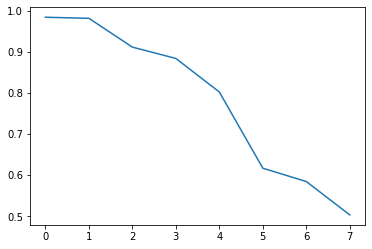

In [12]:
sns.lineplot(np.arange(8), (AOPC / total).numpy())
(AOPC / total).mean()

In [40]:
attn_logits = (y_hat_ * relevance_weights.unsqueeze(-1))
attn_logits.shape

torch.Size([400, 8, 5])

In [46]:
attn_arg = torch.sort(relevance_weights.detach(), 1, descending=True)[1] 
attn_arg.shape

torch.Size([400, 8])

In [43]:
logits_sorted_attn = torch.gather(attn_logits, 1, attn_arg.unsqueeze(2).repeat(1, 1, 5))
logits_sorted_attn.shape

torch.Size([400, 8, 5])

In [49]:
F.softmax(attn_logits[:, i:].sum(1), -1)[torch.arange(config['batch_size']), y.cpu()]

tensor([0.5154, 0.9541, 0.2596, 0.1958, 0.5922, 0.4052, 0.7570, 0.7359, 0.4457,
        0.4637, 0.6014, 0.5824, 0.7753, 0.6195, 0.4564, 0.3610, 0.2783, 0.3971,
        0.5137, 0.5275, 0.5188, 0.3448, 0.3002, 0.1920, 0.7234, 0.3507, 0.5948,
        0.1809, 0.2167, 0.4179, 0.8205, 0.1951, 0.2014, 0.3883, 0.1995, 0.5747,
        0.4463, 0.9984, 0.3526, 0.7704, 0.1365, 0.3334, 0.5709, 0.5893, 0.3608,
        0.5946, 0.6105, 0.8473, 0.4923, 0.4068, 0.6742, 0.7270, 0.6589, 0.1994,
        0.9037, 0.4070, 0.7013, 0.7121, 0.6922, 0.3998, 0.5874, 0.7319, 0.5994,
        0.7255, 0.3601, 0.4331, 0.5513, 0.3422, 0.3772, 0.6082, 0.4379, 0.3026,
        0.7597, 0.7866, 0.2413, 0.4078, 0.5729, 0.2568, 0.3004, 0.3255, 0.4787,
        0.8793, 0.4236, 0.4416, 0.5533, 0.4767, 0.4300, 0.7310, 0.8600, 0.4967,
        0.4011, 0.7467, 0.3980, 0.8315, 0.5110, 0.2888, 0.6788, 0.3947, 0.6496,
        0.4515, 0.5340, 0.2448, 0.4135, 0.4361, 0.2426, 0.8497, 0.4930, 0.7012,
        0.6595, 0.8086, 0.6455, 0.8535, 

## accuracy

In [136]:
x_orig = []
y_pred = []
y_true = []
selective_actions = []
relevance_weights = []
predicted_head = []

# model = model.cuda()

for x, y in tqdm(test_loader):
    x, y = x.cuda(), y.cuda()
    batch_size = x.shape[0]
    y_hat_, _, selective_actions, relevance_weights = model(x, x != 0, heads=True) 
    
    y_hat_ = y_hat_.detach().reshape(batch_size, config['n_heads'], -1).cpu()
    selective_actions = selective_actions.detach().cpu()
    relevance_weights = relevance_weights.detach().cpu() 
    x = x.detach().cpu()
    y = y.detach().cpu()
    
    y_hat = (y_hat_ * relevance_weights.unsqueeze(-1)).sum(1)
    
    x_orig.append(x.numpy())
    y_pred.append(y_hat.argmax(1).numpy())
    y_true.append(y.numpy())
    selective_actions.append(selective_actions.numpy())
    relevance_weights.append(relevance_weights.numpy())
    predicted_head.append(F.softmax(y_hat_, -1).numpy())
    del x, y, y_hat_, y_hat, _, selective_actions, relevance_weights
    

x_orig = np.concatenate(x_orig)
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)
selective_actions = np.concatenate(selective_actions)
relevance_weights = np.concatenate(relevance_weights)
predicted_head = np.concatenate(predicted_head)

  0%|          | 0/219 [00:00<?, ?it/s]

In [13]:
(
    accuracy_score(y_true, y_pred),
    precision_score(y_true, y_pred, average="macro"),
    recall_score(y_true, y_pred, average="macro"),
)

(0.9871174052078575, 0.9254750239940979, 0.9330925355760472)

In [14]:
predicted_head[0, 0]

array([0.3811375 , 0.44171932, 0.00335293, 0.01085569, 0.16293459],
      dtype=float32)

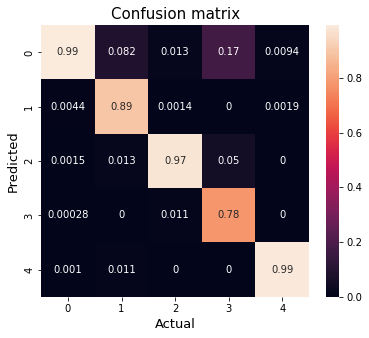

In [15]:
C = confusion_matrix(y_true, y_pred)
C = C / C.astype(float).sum(axis=0)

fig, ax = plt.subplots(figsize=(6, 5))
# cm_ = ax.imshow(C, cmap="hot")
sns.heatmap(C, annot=True)
ax.set_title("Confusion matrix", fontsize=15)
ax.set_xlabel("Actual", fontsize=13)
ax.set_ylabel("Predicted", fontsize=13)
# plt.colorbar(cm_)
plt.show()

# Attention visualisation

In [16]:
max_len = 187

In [141]:
selective_actions.shape, relevance_weights.shape

((87556, 8, 178), (87556, 8))

In [137]:
selection = np.zeros((selective_actions.shape[0], selective_actions.shape[1], max_len))
for i in tqdm(range(selective_actions.shape[0])):
    for h in range(selective_actions.shape[1]):
        for k in range(selective_actions.shape[-1]):
            if selective_actions[i, h, k] > 0:
                left = max(0, k - 5)
                right = min(max_len, k + 5)
                selection[i, h, left:right] = 1

selection.shape

  0%|          | 0/87556 [00:00<?, ?it/s]

(87556, 8, 187)

In [138]:
" ".join([str(i) for i in (np.where(y_true == 4) and np.where(y_pred == 4))[0]][:100])

'0 4 5 14 19 34 43 65 66 95 104 108 115 122 132 141 142 145 154 164 187 198 220 227 236 280 292 316 356 361 364 397 420 426 465 476 486 509 525 541 553 554 616 649 654 675 681 686 689 717 745 747 749 806 811 823 869 870 873 899 922 928 930 935 939 987 991 1028 1031 1033 1035 1038 1057 1075 1103 1107 1117 1121 1128 1147 1181 1200 1213 1215 1218 1225 1237 1244 1247 1291 1325 1330 1350 1353 1365 1371 1375 1384 1389 1394'

0 0
[0.31469041109085083, 1.2100586891174316, 0.12827956676483154, 0.36278679966926575, 0.6162081360816956, 0.22845935821533203, 0.24589036405086517, 0.6566517353057861]
1 1
[0.5253962874412537, 0.07307351380586624, 3.2380456924438477, 1.3814640045166016, 0.002690220484510064, 0.003358004614710808, 0.023716045543551445, 0.05535921826958656]
2 2
[0.07766472548246384, 0.12514720857143402, 0.022490128874778748, 0.023003792390227318, 0.7220900654792786, 1.4966994524002075, 0.03714027628302574, 0.06405777484178543]
3 3
[0.04162049666047096, 0.7419418692588806, 0.006869141012430191, 0.006109108682721853, 2.6835403442382812, 0.03485981002449989, 0.0071727135218679905, 0.30297616124153137]
4 4
[0.5246480107307434, 0.640977680683136, 0.10823563486337662, 0.6100265383720398, 0.010995358228683472, 0.001074570813216269, 0.023329248651862144, 0.15677879750728607]


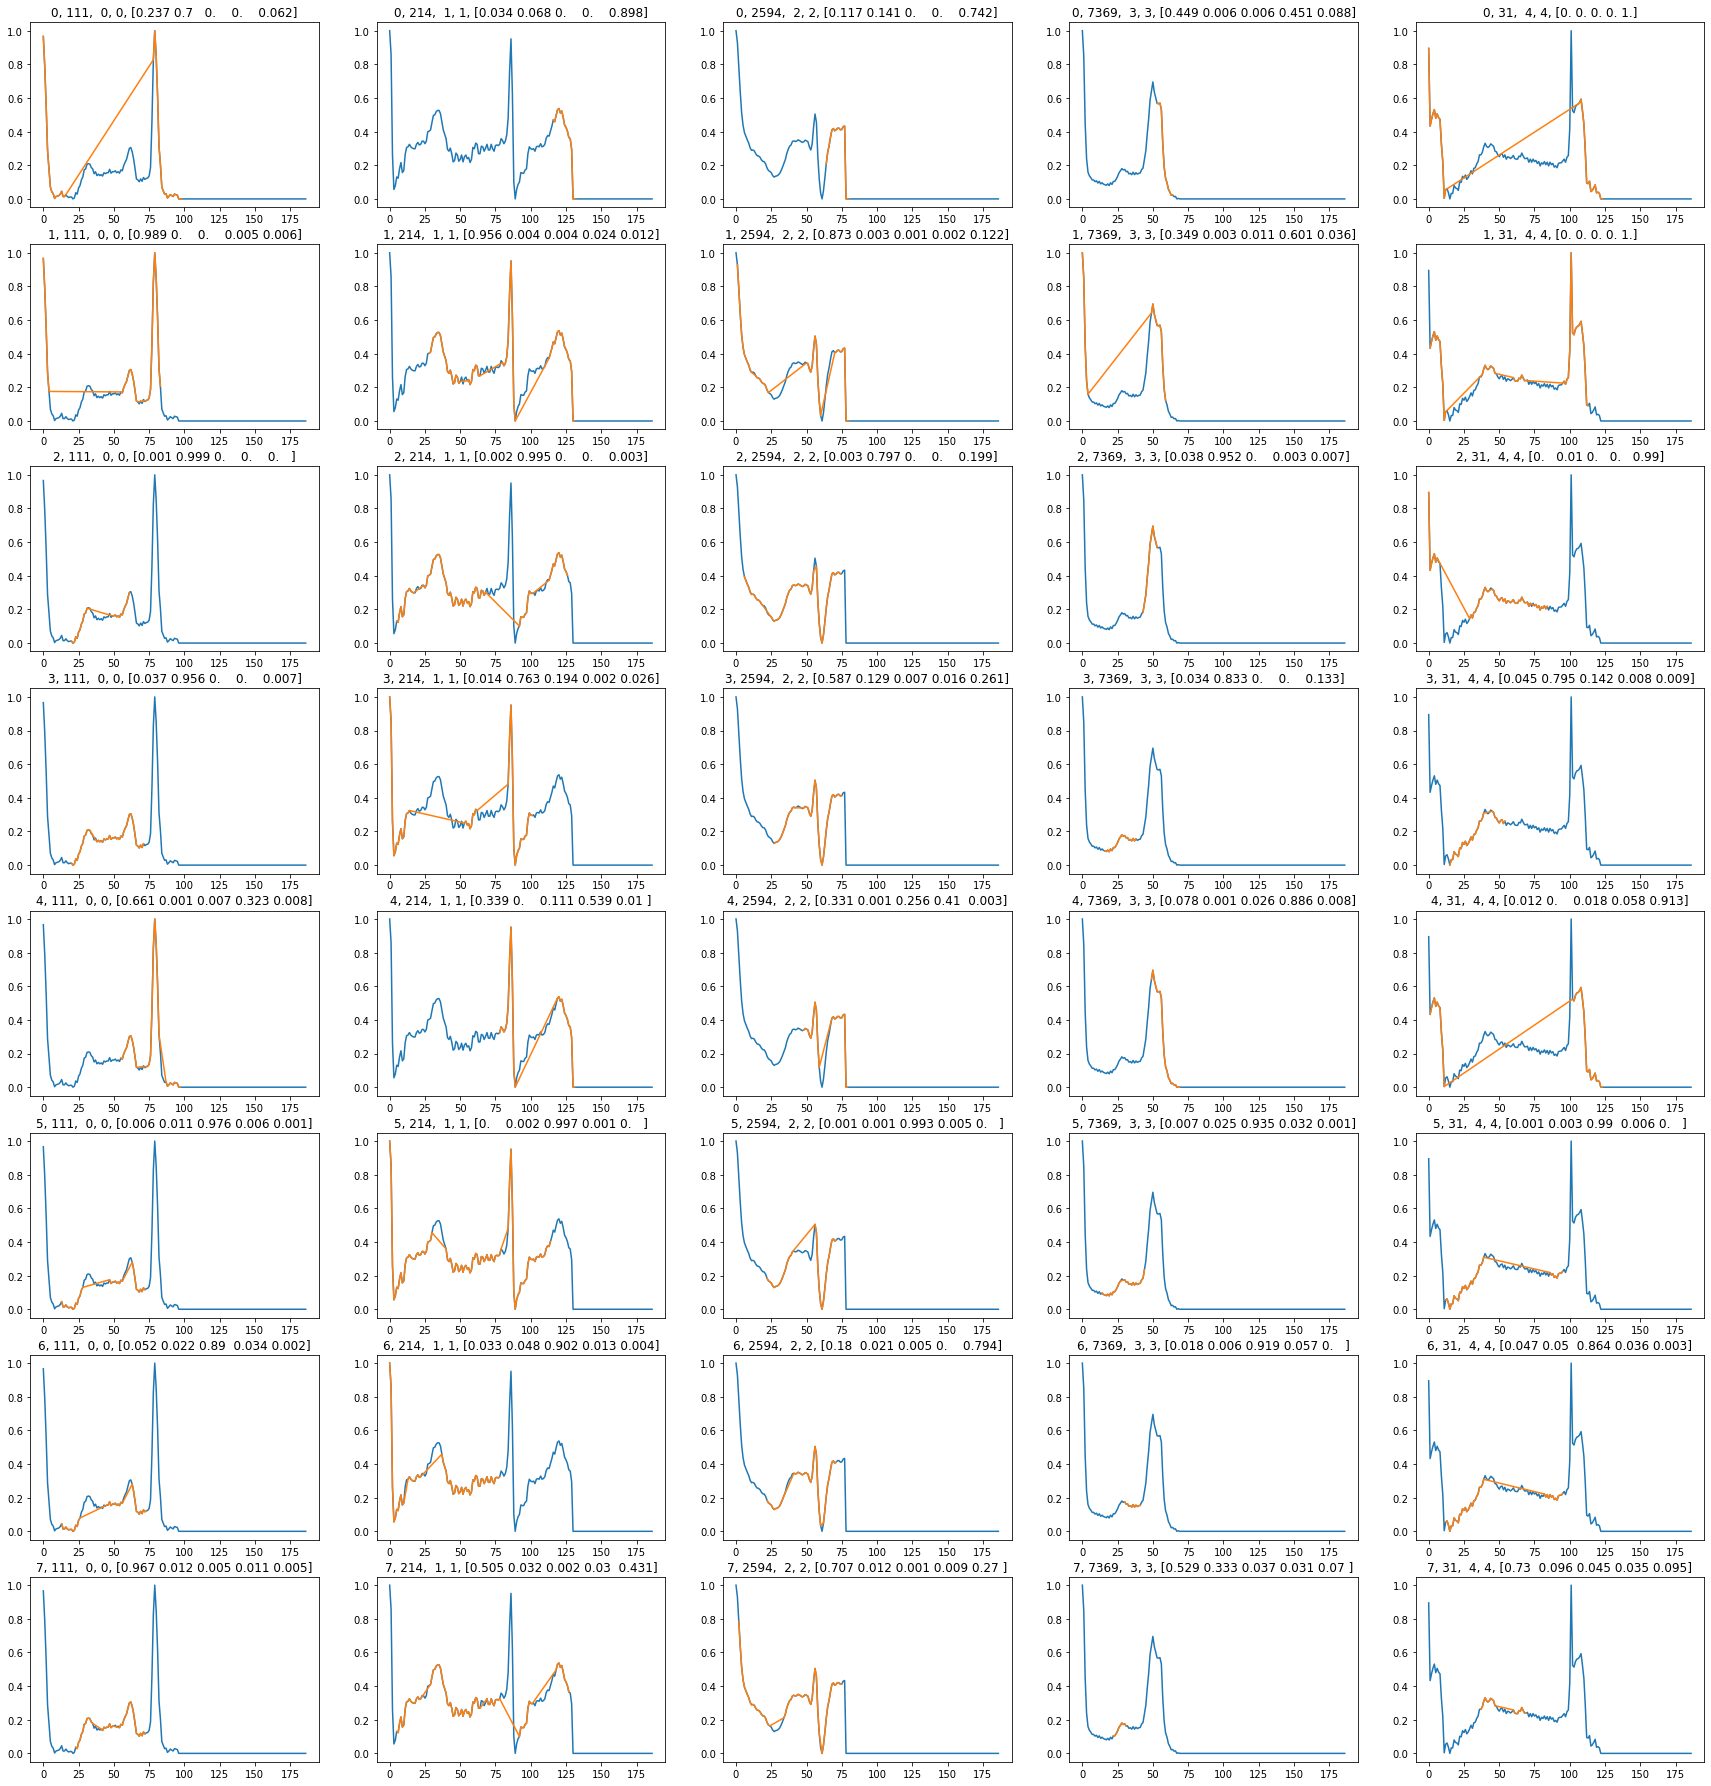

In [112]:
# indices = np.array([[24, 25], [28, 214], [27, 13883], [14552, 6043], [17, 31]]).flatten("F")
indices = np.array([111, 214, 2594, 7369, 31])
# indices = (np.where(y_true == 2) and np.where(y_pred == 2))[0][1:6]

n = len(indices)
fig, ax = plt.subplots(8, 5, figsize=(30, 32))
# ax = axes.flatten()


for i in range(n):
    idx = indices[i]
    print(y_true[idx], y_pred[idx])
    print(relevance_weights[idx].tolist())

    for head in range(8):

        # print(selection[idx].sum(-1))
        # head = selection[idx].sum(-1).argmax()


        sns.lineplot(x=np.arange(max_len), y=x_orig[idx], ax=ax[head, i])

        # print((x_orig[idx] * selection[idx, head]).sum())

        nonzero = np.nonzero(selection[idx, head])[0]

        sns.lineplot(x=nonzero, y=x_orig[idx, nonzero], ax=ax[head, i])

        # ax[head, i].title.set_text(
        #     f"{h}, {idx}, {relevance_weights[idx, head]}, {y_true[idx]}, {y_pred[idx]}"
        # )
        ax[head, i].title.set_text(
            f"{head}, {idx},  {y_true[idx]}, {y_pred[idx]}, {np.around(predicted_head[idx, head], 3)}"
        )

In [19]:
idx = 557   
for d in range(x_orig.shape[1]):
    print(x_orig[idx,d ], end=',')

0.78114086,0.70547146,0.61816067,0.55995345,0.48079163,0.41094297,0.330617,0.2491269,0.16181606,0.119906865,0.08498254,0.05005821,0.017462166,0.0,0.026775321,0.09895227,0.15017462,0.17229337,0.19208382,0.20023283,0.2153667,0.25844005,0.2840512,0.32712457,0.36554134,0.40395808,0.41327125,0.42956927,0.44004658,0.45634457,0.4691502,0.49243307,0.50523865,0.5331781,0.5518044,0.5820722,0.60302675,0.6332945,0.6507567,0.66821885,0.6763679,0.6845169,0.6798603,0.67287546,0.653085,0.6332945,0.6018626,0.5750873,0.53667057,0.5064028,0.47380674,0.45168802,0.42840514,0.4225844,0.40512222,0.40279394,0.39580908,0.39697322,0.39348078,0.39348078,0.38649592,0.39464495,0.38882422,0.39697322,0.3911525,0.3993015,0.4016298,0.40861467,0.40745053,0.4144354,0.41559952,0.42142025,0.41792783,0.42374855,0.42142025,0.42607683,0.42142025,0.4330617,0.42724097,0.43422586,0.43422586,0.44004658,0.44935971,0.46798602,0.48894063,0.50523865,0.5168801,0.52852154,0.5064028,0.5133877,0.5168801,0.5133877,0.4935972,0.49010476,0.

In [117]:
head = 5
selection[idx, head], relevance_weights[idx, head], predicted_head[idx, head]
for d in range(selection.shape[2]):
    if selection[idx, head, d] == 1:
        print(x_orig[idx, d], end=',')
    else:
        print(' ', end=',')

 , , , , , , , , , , , , , ,0.09602649,0.08774834,0.08443709,0.081125826,0.08940397,0.0794702,0.09602649,0.08609272,0.104304634,0.104304634,0.117549665,0.13410597,0.15562914,0.16721854, , ,0.17549668,0.16225165,0.16390729,0.14900662,0.15231788,0.14403974,0.1589404,0.14403974,0.15562914,0.147351,0.15231788,0.1539735,0.17384106,0.18377483,0.23509933, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ,

In [119]:
for h in range(8):
    print(h, round(relevance_weights[idx, h], 3), [round(d, 3) for d in predicted_head[idx, h].tolist()])

0 0.315 [0.237, 0.7, 0.0, 0.0, 0.062]
1 1.21 [0.989, 0.0, 0.0, 0.005, 0.006]
2 0.128 [0.001, 0.999, 0.0, 0.0, 0.0]
3 0.363 [0.037, 0.956, 0.0, 0.0, 0.007]
4 0.616 [0.661, 0.001, 0.007, 0.323, 0.008]
5 0.228 [0.006, 0.011, 0.976, 0.006, 0.001]
6 0.246 [0.052, 0.022, 0.89, 0.034, 0.002]
7 0.657 [0.967, 0.012, 0.005, 0.011, 0.005]


In [62]:
relevance_weights[idx, [1, 7]].sum()

2.4162297

/storage/zyf/mambaforge/envs/torch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

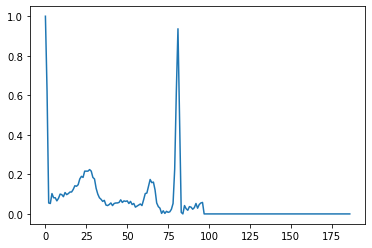

In [27]:
sns.lineplot(np.arange(187), x_orig[0])

In [143]:
rep_head = np.argpartition(relevance_weights, -3)[:, -3:] 
rep_head

array([[3, 2, 0],
       [7, 1, 4],
       [5, 1, 4],
       ...,
       [7, 4, 1],
       [3, 4, 1],
       [7, 4, 1]])

In [144]:
counts = np.zeros(8)
results = [[], [], [], [], [], [], [], []]
for i in tqdm(range(selection.shape[0])):
    # print('x')
    # for d in range(x_orig.shape[1]):
    #     print(x_orig[i,d], end=',')
    # print('')
    for j in range(3):
        if counts[rep_head[i, j]] >= 10:
            continue
        counts[rep_head[i, j]] += 1
        results[rep_head[i, j]].append((x_orig[i], selection[i, rep_head[i, j]]))
        # print('head', rep_head[i, j])
        # for d in range(selection.shape[2]):
        #     if selection[i, rep_head[i, j], d] == 1:
        #         print(x_orig[i, d], end=',')
        #     else:
        #         print(' ', end=',')
        # print('')

  0%|          | 0/87556 [00:00<?, ?it/s]

In [145]:
import pandas as pd

In [146]:
for h in range(8):
    with open(f'prototypes{h}.csv', 'w') as f:
        for i in range(len(results[0])):
            x_, s_ = results[h][i]
            p_ = []
            for d in range(len(x_)):
                if s_[d] == 1: 
                    p_.append(str(x_[d])) 
                else:
                    p_.append(' ') 
            f.writelines(','.join([str(d) for d in x_])) 
            f.writelines('\n')
            f.writelines(','.join(p_))  
            f.writelines('\n')
    
    df = pd.read_csv(f'prototypes{h}.csv', header=None)
    df.T.to_csv(f'prototypes{h}.csv', header=None)

In [58]:
predicted_head.max(2)

array([[0.44171932, 0.97918576, 0.97820777, ..., 0.8871438 , 0.74757826,
        0.7964625 ],
       [0.6480041 , 0.6828102 , 0.42944425, ..., 0.90574497, 0.73958945,
        0.74420387],
       [0.35830253, 0.99428916, 0.88296515, ..., 0.8820149 , 0.35433185,
        0.9387712 ],
       ...,
       [0.7131906 , 0.98391867, 0.9322042 , ..., 0.806905  , 0.62982357,
        0.72464895],
       [0.58531547, 0.892024  , 0.9999565 , ..., 0.8007606 , 0.999998  ,
        0.5198272 ],
       [0.6066462 , 0.93645215, 0.99453026, ..., 0.60907704, 0.6022016 ,
        0.9468797 ]], dtype=float32)

In [67]:
np.bincount(predicted_head.argmax(2)[:, h])#.sum(0)

array([18714,  1539,   414,   114,  1109])

In [82]:
a = []
for h in range(8):
    a.append(np.bincount(predicted_head.argmax(2)[:, h]))
a = np.vstack(a)
np.around(a / 21890, 3)

array([[0.372, 0.146, 0.   , 0.043, 0.439],
       [0.896, 0.001, 0.002, 0.019, 0.082],
       [0.119, 0.814, 0.006, 0.   , 0.061],
       [0.172, 0.659, 0.073, 0.   , 0.095],
       [0.407, 0.001, 0.087, 0.454, 0.051],
       [0.024, 0.126, 0.849, 0.001, 0.001],
       [0.264, 0.028, 0.629, 0.019, 0.061],
       [0.855, 0.07 , 0.019, 0.005, 0.051]])

In [30]:
np.argsort(predicted_head[:, 0, :], 1)

array([[2, 3, 4, 0, 1],
       [4, 2, 3, 1, 0],
       [4, 1, 3, 2, 0],
       ...,
       [2, 3, 1, 0, 4],
       [2, 1, 4, 3, 0],
       [2, 1, 3, 4, 0]])

In [28]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

n_classes = 5
b_y_true = label_binarize(y_true, classes=np.arange(n_classes))
b_y_pred = label_binarize(y_pred, classes=np.arange(n_classes))

In [29]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(b_y_true[:, i], b_y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(b_y_true.ravel(), b_y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/tmp/ipykernel_3564784/3958833219.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


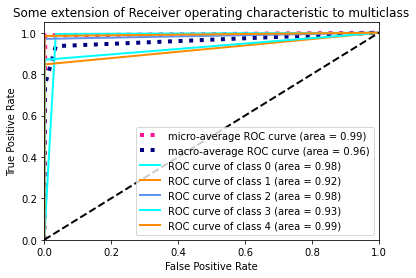

In [30]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [12]:
torch.gather(torch.tensor(y_true), 0, torch.tensor([86532,   68886, 37615, 45996, 41031]))

tensor([0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])